In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,f1_score ,accuracy_score, mean_squared_error,recall_score ,roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# lets drop customerID column
df.drop('customerID', axis=1,inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df_cat = df.select_dtypes('object')

In [10]:
for i in df_cat.columns:
    print(df_cat[i].value_counts(dropna = False))
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     2810
Yes                    2707
No internet service    15

In [11]:
# Total charges should be in float type
# However there are some missing values lets convert this a very big number like 999999
# Before changing type we should impute missing values.


for i in df[df['TotalCharges'] == ' ']['TotalCharges'].index:
    df.iloc[i, df.columns.get_loc('TotalCharges')] = '999999'

# Lets convert the TotalChatges to float
df = df.astype({'TotalCharges': 'float64'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
#lets check categorical features again
df_cat = df.select_dtypes(['object'])
for i in df_cat.columns:
    print(df_cat[i].value_counts(dropna = False))
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     2810
Yes                    2707
No internet service    15

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

### gender
The gender of the customers is almost equally distributed.

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64


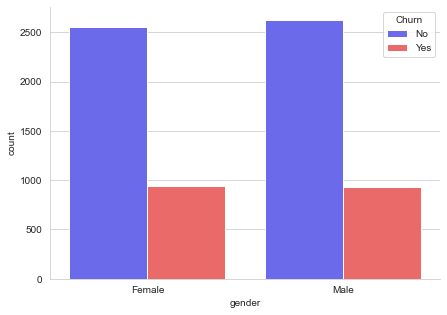

In [15]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='gender', data=df, hue='Churn',palette='seismic')
sns.despine()
print(df.groupby('gender')['Churn'].value_counts())

### SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)

The number of Senior citizens is not too much, but it is obvious from the grap: they are more likely to churn.

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64


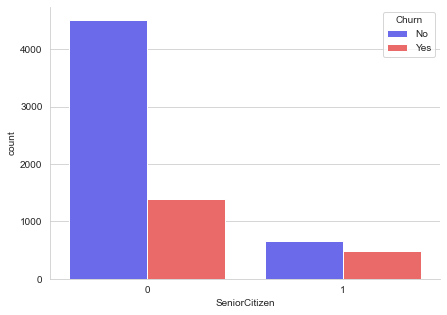

In [16]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen', data=df, hue='Churn',palette='seismic' )
sns.despine()
print(df.groupby('SeniorCitizen')['Churn'].value_counts())

### Partner & Dependents

Whether the customer has a partner or not (Yes, No)

Whether the customer has dependents or not (Yes, No)

From these two graph, it can be inferred that the people who have no dependents and partners are more likely to churn.

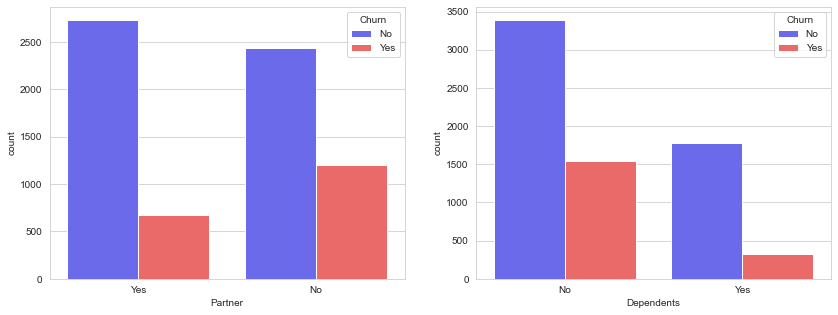

In [17]:
fig, axs = plt.subplots(ncols=2,figsize=(14,5))

sns.countplot(x='Partner',data=df, hue='Churn',ax=axs[0],palette='seismic')
sns.countplot(x='Dependents',data=df, hue='Churn',ax=axs[1],palette='seismic')
plt.show()

### tenure

Number of months the customer has stayed with the company.

The distribution of tenure values is seemed like bimodal. 

<AxesSubplot:xlabel='tenure', ylabel='Density'>

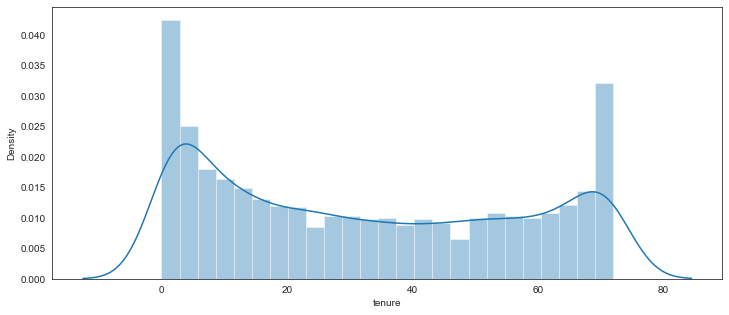

In [18]:
plt.figure(figsize=(12,5))
sns.set_style('white')
sns.distplot(df.tenure,bins=25)

### Services 

'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',

'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'


In [19]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

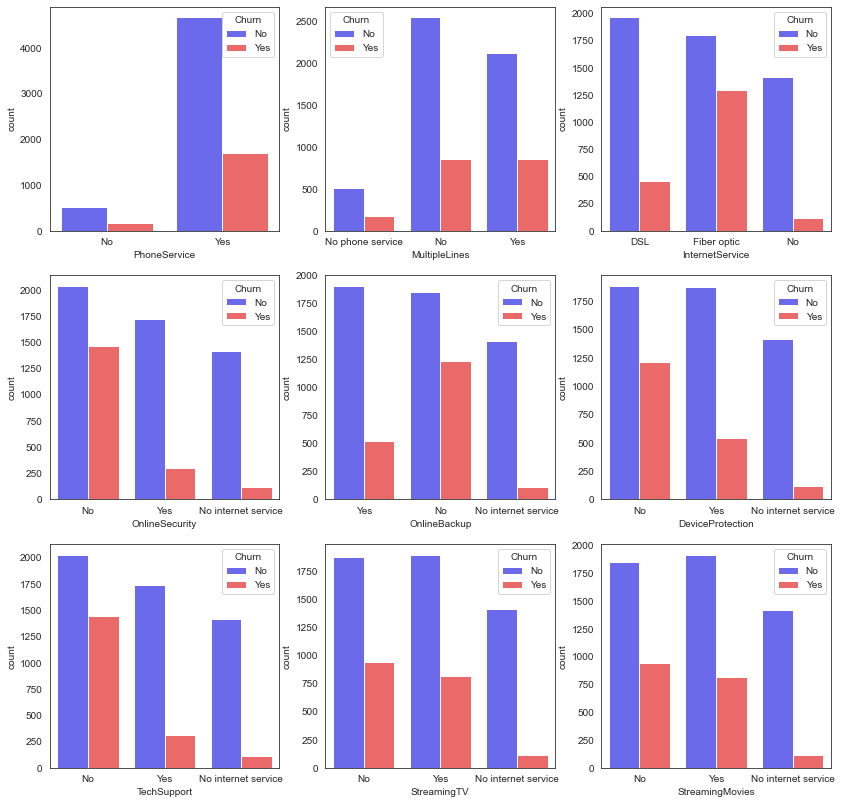

In [20]:
plt.figure(figsize=(14,14))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.countplot(x = services[i-1],data=df, hue='Churn', palette='seismic')  

In [21]:
######lets convert No internet service and No phone service values to just No.

correct_list = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']


for i in correct_list:
    df[i] = df[i].replace('No internet service','No')

In [22]:
# lets check one of them
df['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [23]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [24]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

### Contract

which type of contract the customer has


<AxesSubplot:xlabel='Contract', ylabel='count'>

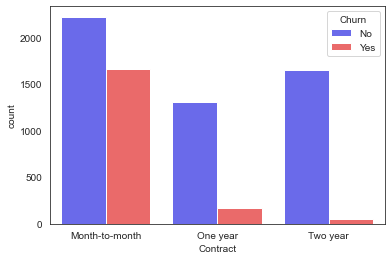

In [25]:
sns.countplot(x='Contract', data=df, hue='Churn', palette='seismic')

### PaperlessBilling



<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

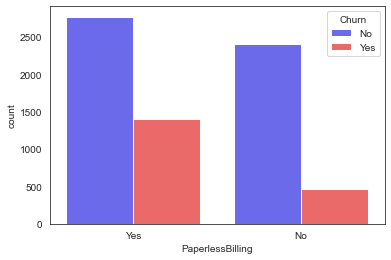

In [26]:
sns.countplot(x='PaperlessBilling', data=df, hue ='Churn', palette='seismic')

### PaymentMethod

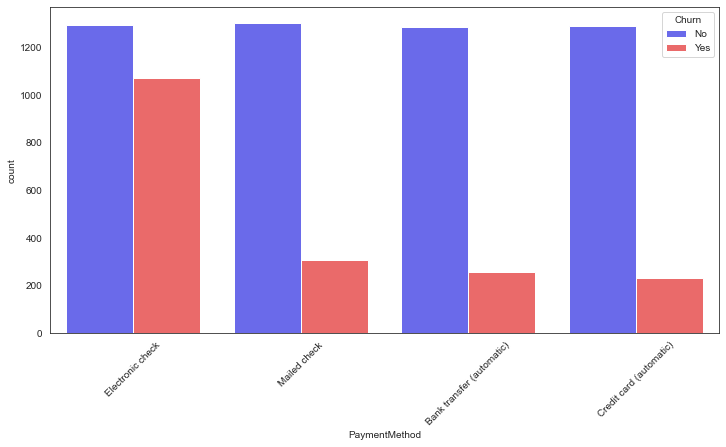

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentMethod',data=df, hue='Churn',palette='seismic')
plt.xticks(rotation=45)
plt.show()

### MonthlyCharges

In [28]:
df[['MonthlyCharges']].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

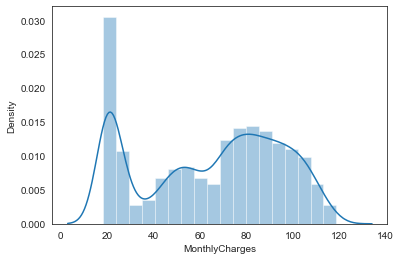

In [29]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

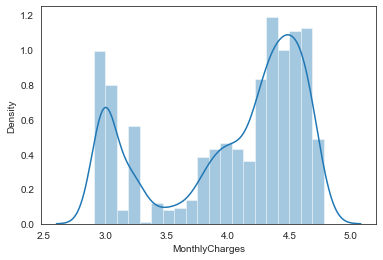

In [30]:
sns.distplot(np.log(df['MonthlyCharges']))

### TotalCharges

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

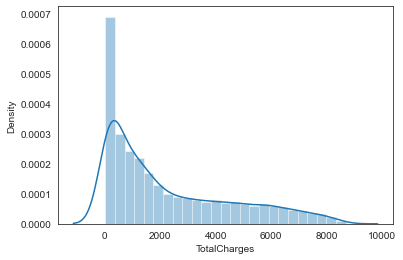

In [31]:
sns.distplot(df[df['TotalCharges'] != 999999]['TotalCharges'] )

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

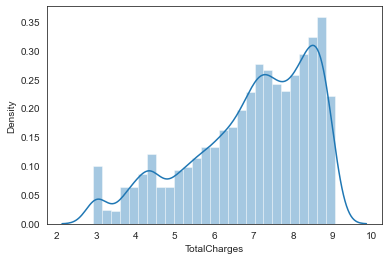

In [32]:
sns.distplot(np.log(df[df['TotalCharges'] != 999999]['TotalCharges']) )

In [33]:
df[df['TotalCharges'] != 999999]['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [34]:
np.median(df[df['TotalCharges'] != 999999]['TotalCharges'])

1397.475

#### Imputation of TotalCharges with median of the column

In [35]:
for i in df[df['TotalCharges'] == 999999]['TotalCharges'].index:
    df.iloc[i, df.columns.get_loc('TotalCharges')] = 1397.475

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

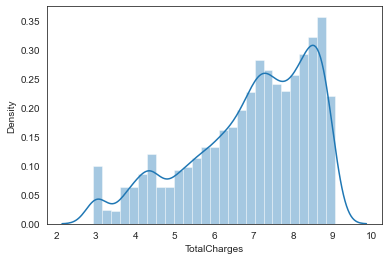

In [36]:
sns.distplot(np.log(df['TotalCharges']))

In [37]:
# lets convert the Yes/No response to 1/0

In [38]:
cols = list(df.columns)
cols_with_2unique =[]
for i in cols:
    if df[i].nunique() == 2:
        cols_with_2unique.append(i)
df[cols_with_2unique].head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Female,0,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No


In [39]:
df[cols_with_2unique[2:]].head(2)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No


In [40]:
correct_list2 = cols_with_2unique[2:]

map_dict = {'No':0,'Yes':1}

for i in correct_list2:
    df[i] = df[i].map(map_dict)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [43]:
df.drop('Churn',axis=1).to_pickle("to_streamlit.pkl")

In [44]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [45]:
df_dum = pd.get_dummies(data = df, drop_first=True )

In [46]:
df_dum.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## Feature Engineering

In [47]:
df_dum['#_of_Services'] = df[['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']].sum(axis=1)

In [48]:
df_dum['TotalCharges_logged'] = np.log(df['TotalCharges'])
df_dum['MonthlyCharges_logged'] = np.log(df['MonthlyCharges'])

In [49]:
df_dum.corr()['Churn'].sort_values()

tenure                                  -0.352229
Contract_Two year                       -0.302253
TotalCharges_logged                     -0.241869
InternetService_No                      -0.227890
TotalCharges                            -0.199037
Contract_One year                       -0.177820
OnlineSecurity                          -0.171226
TechSupport                             -0.164674
Dependents                              -0.164221
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
#_of_Services                           -0.087698
OnlineBackup                            -0.082255
DeviceProtection                        -0.066160
gender_Male                             -0.008612
PhoneService                             0.011942
MultipleLines                            0.040102
StreamingMovies                          0.061382
StreamingTV                              0.063228


<AxesSubplot:>

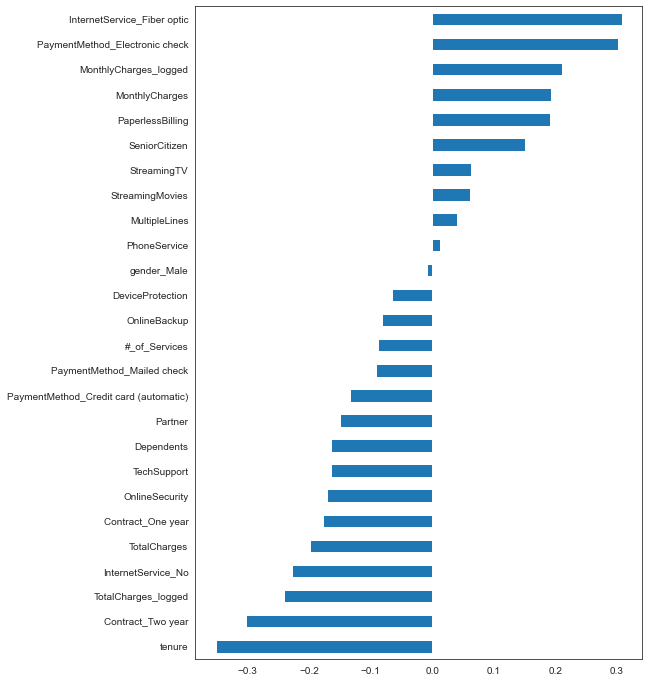

In [50]:
plt.figure(figsize=(8,12))
df_dum.corr()['Churn'].sort_values()[:-1].plot(kind='barh')

<AxesSubplot:>

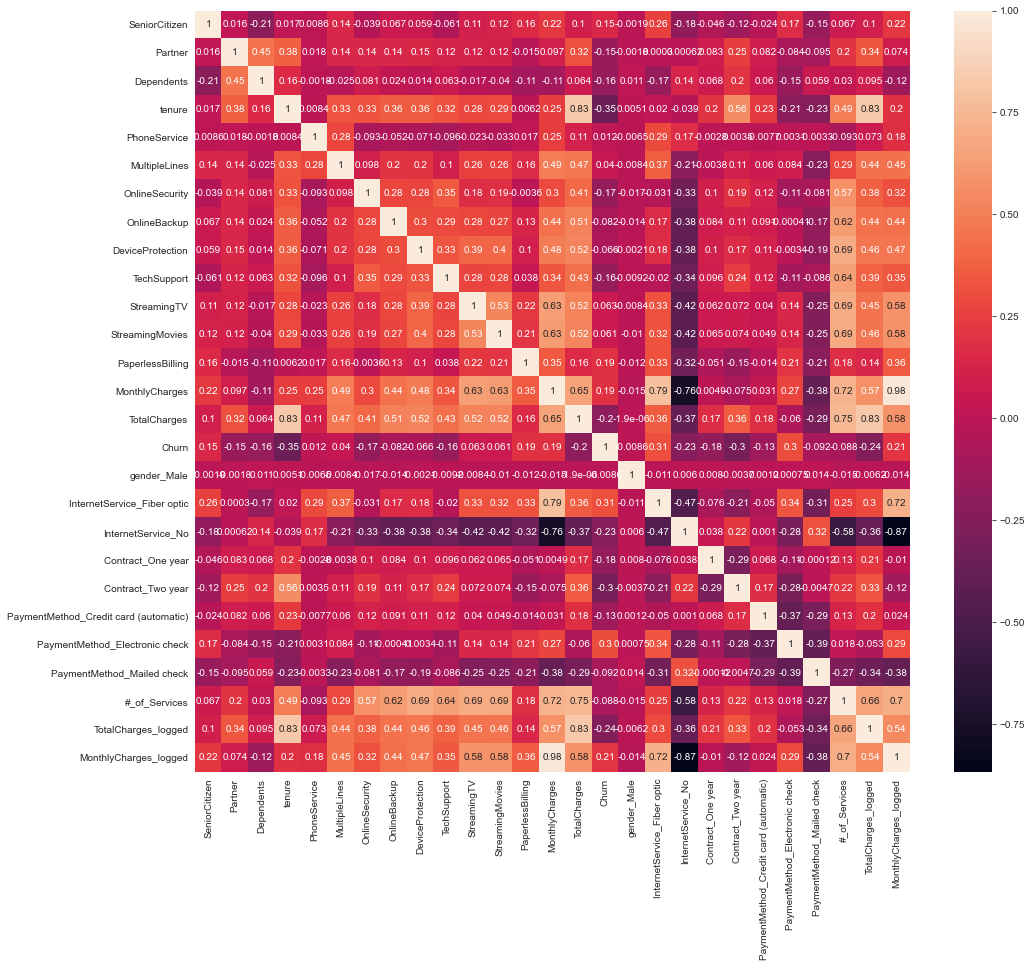

In [51]:
plt.figure(figsize=(16,14))
sns.heatmap(df_dum.corr(), annot=True)

In [52]:
df_dum_log = df_dum.drop(['TotalCharges', 'MonthlyCharges'], axis=1)

In [53]:
df_dum_log.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       '#_of_Services', 'TotalCharges_logged', 'MonthlyCharges_logged'],
      dtype='object')

In [54]:
df_dum_log.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [55]:
df_dum_log.drop('Churn',axis=1).columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       '#_of_Services', 'TotalCharges_logged', 'MonthlyCharges_logged'],
      dtype='object')

In [56]:
df_dum_log.shape

(7043, 25)

In [57]:
### Split

In [58]:
#lets first define X and y
X = df_dum_log.drop('Churn', axis=1).values
y = df_dum_log['Churn'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


 90%|█████████ | 27/30 [00:19<00:02,  1.49it/s]

[14:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:20<00:00,  1.49it/s]


In [61]:
models.sort_values('F1 Score', ascending =False)[:8]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.81,0.76,0.76,0.81,0.23
LogisticRegression,0.81,0.72,0.72,0.80,0.09
LinearDiscriminantAnalysis,0.81,0.72,0.72,0.80,0.10
BernoulliNB,0.79,0.76,0.76,0.80,0.06
LinearSVC,0.81,0.71,0.71,0.80,0.44
CalibratedClassifierCV,0.80,0.71,0.71,0.79,2.78
SVC,0.81,0.71,0.71,0.79,1.60
AdaBoostClassifier,0.80,0.71,0.71,0.79,0.78


In [62]:
predictions.sort_values('F1 Score', ascending =False)[:8]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.81,0.76,0.76,0.81,0.23
LogisticRegression,0.81,0.72,0.72,0.80,0.09
LinearDiscriminantAnalysis,0.81,0.72,0.72,0.80,0.10
BernoulliNB,0.79,0.76,0.76,0.80,0.06
LinearSVC,0.81,0.71,0.71,0.80,0.44
CalibratedClassifierCV,0.80,0.71,0.71,0.79,2.78
SVC,0.81,0.71,0.71,0.79,1.60
AdaBoostClassifier,0.80,0.71,0.71,0.79,0.78


### Tackling imbalance of Churn column

In [63]:
# Since there is so many categorical features in our data set we will tackle it using SMOTE_NC.

In [64]:
df_dum_log.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       '#_of_Services', 'TotalCharges_logged', 'MonthlyCharges_logged'],
      dtype='object')

In [65]:
# this finds categorical features
cols = list(df_dum_log.columns)
cols_with_2unique =[]
for i in cols:
    if df_dum_log[i].nunique() == 2:
        cols_with_2unique.append(i)
        
# this extract the number of indices of categirical features
cat_feat_list = []
for ind, name in enumerate(list(df_dum_log.columns)):
    if name in cols_with_2unique:
        cat_feat_list.append(ind)
        
cat_feat_list

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [66]:
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 3892, 1: 1390})


In [67]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.6)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [68]:
print('Resampled dataset shape %s' % Counter(y_res))
print('Resampled dataset shape %s' % Counter(y_test))

Resampled dataset shape Counter({0: 3892, 1: 2335})
Resampled dataset shape Counter({0: 1282, 1: 479})


In [69]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_res, X_test, y_res, y_test)

 90%|█████████ | 27/30 [00:23<00:01,  1.53it/s]

[14:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


In [70]:
predictions.sort_values('F1 Score',ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.81,0.76,0.76,0.81,2.77
LogisticRegression,0.80,0.77,0.77,0.80,0.12
LinearDiscriminantAnalysis,0.80,0.77,0.77,0.80,0.09
LinearSVC,0.80,0.77,0.77,0.80,0.78
RidgeClassifierCV,0.80,0.77,0.77,0.80,0.06
RidgeClassifier,0.80,0.77,0.77,0.80,0.06
AdaBoostClassifier,0.80,0.77,0.77,0.80,0.55
NuSVC,0.80,0.74,0.74,0.80,2.08
BernoulliNB,0.79,0.77,0.77,0.79,0.06


In [71]:
models.sort_values('F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.81,0.76,0.76,0.81,2.77
LogisticRegression,0.80,0.77,0.77,0.80,0.12
LinearDiscriminantAnalysis,0.80,0.77,0.77,0.80,0.09
LinearSVC,0.80,0.77,0.77,0.80,0.78
RidgeClassifierCV,0.80,0.77,0.77,0.80,0.06
RidgeClassifier,0.80,0.77,0.77,0.80,0.06
AdaBoostClassifier,0.80,0.77,0.77,0.80,0.55
NuSVC,0.80,0.74,0.74,0.80,2.08
BernoulliNB,0.79,0.77,0.77,0.79,0.06


In [72]:
# Here, I have tried to find the best minority/majority ratio for train set, with smote some metrics improved.
# And using lazy predict we have found the best classifiers for our data
#These are listed below:
# CalibratedClassifierCV
# LogisticRegression
# LinearDiscriminantAnalysis
# LinearSVC
# RidgeClassifierCV
# RidgeClassifier
# AdaBoostClassifier
# Lets try some of them without laz predict


## Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1282
           1       0.65      0.67      0.66       479

    accuracy                           0.81      1761
   macro avg       0.76      0.77      0.76      1761
weighted avg       0.81      0.81      0.81      1761

[[1106  176]
 [ 158  321]]


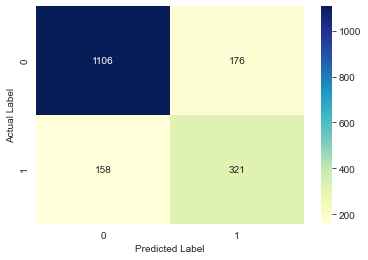

In [73]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.51)
X_res, y_res = sm.fit_resample(X_train, y_train)


model_lg = LogisticRegression()
model_lg.fit(X_res,y_res)
y_pred = model_lg.predict(X_test)

print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [74]:
lg_accuracy = accuracy_score(y_test, y_pred)
lg_f1 = f1_score(y_test,y_pred, average='weighted')
lg_recall = recall_score(y_test, y_pred, average='weighted')


## LinearSVC

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1282
           1       0.50      0.80      0.62       479

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.79      0.73      0.74      1761

[[906 376]
 [ 98 381]]


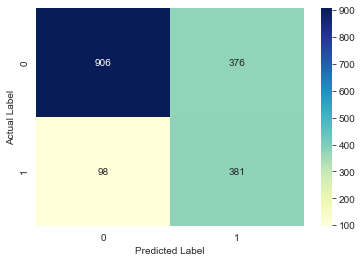

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.52)
X_res, y_res = sm.fit_resample(X_train, y_train)

from sklearn.svm import LinearSVC
model_ls = LinearSVC()
model_ls.fit(X_res,y_res)
y_pred = model_ls.predict(X_test)

print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Linear Discriminant Analysis

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1282
           1       0.63      0.67      0.65       479

    accuracy                           0.80      1761
   macro avg       0.75      0.76      0.76      1761
weighted avg       0.81      0.80      0.81      1761

[[1092  190]
 [ 156  323]]


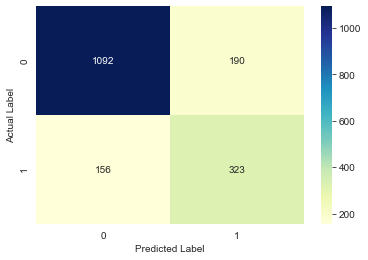

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.52)
X_res, y_res = sm.fit_resample(X_train, y_train)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_res,y_res)
y_pred = model_lda.predict(X_test)

print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Ada Boost Classifier

#### Grid Search for Ada Boost Parameter Tuning

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.52)
X_res, y_res = sm.fit_resample(X_train, y_train)

# from sklearn.model_selection import KFold

from sklearn.ensemble import AdaBoostClassifier
# crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

ada=AdaBoostClassifier()
search_grid={'n_estimators':[150,180,200,220],'learning_rate':[.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,n_jobs=-1, verbose=2,cv=5)
search.fit(X_res,y_res)
search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.0s finished


{'learning_rate': 0.1, 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1282
           1       0.65      0.66      0.65       479

    accuracy                           0.81      1761
   macro avg       0.76      0.76      0.76      1761
weighted avg       0.81      0.81      0.81      1761

[[1112  170]
 [ 165  314]]


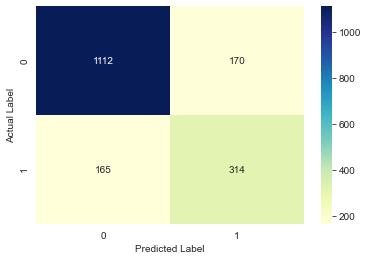

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.51)
X_res, y_res = sm.fit_resample(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
model_ada.fit(X_res,y_res)
y_pred = model_ada.predict(X_test)

print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [78]:
pred_prob = model_ada.predict_proba(X_test)

In [85]:
pred_prob

array([[0.48464282, 0.51535718],
       [0.52300527, 0.47699473],
       [0.55786564, 0.44213436],
       ...,
       [0.52460046, 0.47539954],
       [0.48934182, 0.51065818],
       [0.50536629, 0.49463371]])

In [89]:
pred_prob[:,1:].shape

(1761, 1)

## XGB Classifier

In [306]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# from imblearn.over_sampling import SMOTENC
# from collections import Counter
# sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.52)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# # from sklearn.model_selection import KFold

# from xgboost import XGBClassifier
# # crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

# xgb=XGBClassifier()

# xgb_params = {"n_estimators": [50,500,1000],
#              "subsample":[0.1,0.5,1],
#              "max_depth":[3,7,9],
#              "learning_rate":[0.1,0.01,0.3]}

# search=GridSearchCV(estimator=xgb,param_grid=xgb_params,n_jobs=-1, verbose=2,cv=5)
# search.fit(X_res,y_res)
# search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 16.2min finished


[16:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.5}

[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1282
           1       0.65      0.59      0.62       479

    accuracy                           0.80      1761
   macro avg       0.75      0.74      0.74      1761
weighted avg       0.80      0.80      0.80      1761

[[1126  156]
 [ 194  285]]


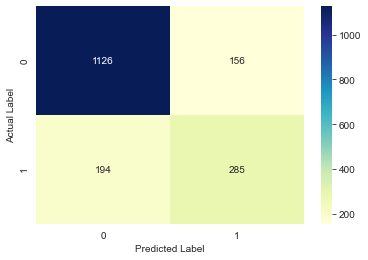

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.52)
X_res, y_res = sm.fit_resample(X_train, y_train)

from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=1000,learning_rate=0.01, subsample=0.5, max_depth=7)
model_xgb.fit(X_res,y_res)
y_pred = model_xgb.predict(X_test)

print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, categorical_features=cat_feat_list, sampling_strategy= 0.51)
X_load, y_load = sm.fit_resample(X, y)

from sklearn.ensemble import AdaBoostClassifier
model_ada_load = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
model_ada_load.fit(X_load,y_load)



AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [85]:
import pickle

pickle.dump(model_ada_load, open ('model_ada_load.pkl','wb'))

In [ ]:
# end of model generation

In [355]:
X_load.shape

(7812, 24)

In [358]:
Counter(y_load)

Counter({0: 5174, 1: 2638})

In [359]:
df_dum_log.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [362]:
df_dum_log.drop('Churn', axis=1).columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       '#_of_Services', 'TotalCharges_logged', 'MonthlyCharges_logged'],
      dtype='object')

<AxesSubplot:>

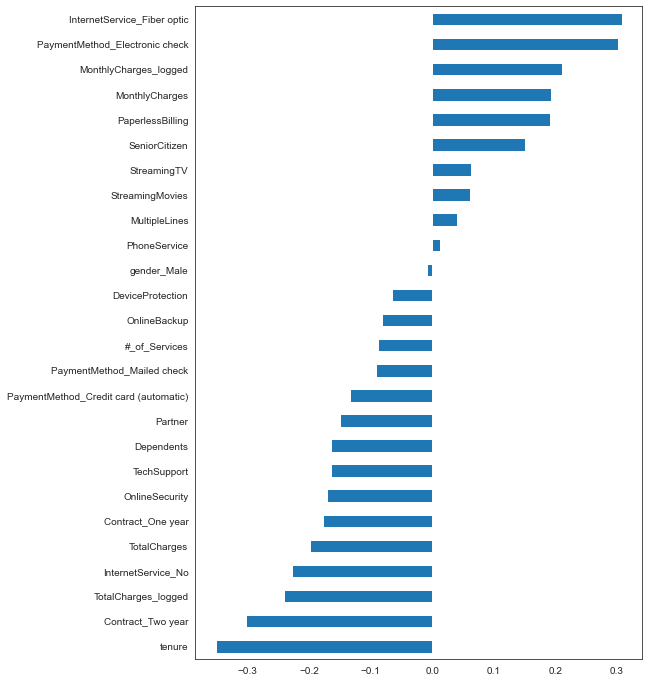

In [363]:
plt.figure(figsize=(8,12))
df_dum.corr()['Churn'].sort_values()[:-1].plot(kind='barh')

In [ ]:

# compare = pd.DataFrame({"Model": ["Logistic Regression", "LinearSVC","Linear Discriminant Analysis","Ada Boost Classifier", "XGBoost Classifier"],
#                         "Accuracy": [lr_accuracy, xgb_accuracy, log_accuracy,knn_accuracy],
#                         "F1 Score": [rfc_f1_score, xgb_f1_score, log_f1_score, knn_f1_score],
#                         "Recall": [rfc_recall, xgb_recall, log_recall,knn_recall],
#                         "F1 Score (True)": [rf_f1_true, xgb_f1_true, log_f1_true, knn_f1_true]})

# def labels(ax):
#     for p in ax.patches:
#         width = p.get_width()    # get bar length
#         ax.text(width,       # set the text at 1 unit right of the bar
#                 p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
#                 '{:1.2f}'.format(width), # set variable to display, 2 decimals
#                 ha = 'left',   # horizontal alignment
#                 va = 'center')  # vertical alignment
    
# plt.subplot(411)
# compare = compare.sort_values(by="Accuracy", ascending=False)
# ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
# labels(ax)
# plt.show()

# plt.subplot(412)
# compare = compare.sort_values(by="Recall", ascending=False)
# ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
# labels(ax)
# plt.xlabel('Recall (Weighted)')
# plt.show()

# plt.subplot(413)
# compare = compare.sort_values(by="F1 Score", ascending=False)
# ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
# labels(ax)
# plt.xlabel('F1 Score (Weighted)')
# plt.show()

# plt.subplot(414)
# compare = compare.sort_values(by="F1 Score", ascending=False)
# ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
# labels(ax)
# plt.show()